# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [66]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"  

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | progreso
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | brad
Processing Record 7 of Set 1 | quellon
Processing Record 8 of Set 1 | loa janan
Processing Record 9 of Set 1 | lugus
Processing Record 10 of Set 1 | thai binh
Processing Record 11 of Set 1 | kutum
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | medina
Processing Record 17 of Set 1 | mudanya
Processing Record 18 of Set 1 | pamandzi
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | nili
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | puerto san carlos
City not found. Skipping...
Proces

In [69]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [71]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-29.06,61,75,9.77,CA,1734642125
1,udachny,66.4167,112.4000,-19.33,92,99,2.28,RU,1734642126
2,port-aux-francais,-49.3500,70.2167,4.83,88,100,7.20,TF,1734642127
3,progreso,21.2833,-89.6667,25.80,73,93,4.97,MX,1734642128
4,port elizabeth,-33.9180,25.5701,20.17,96,100,6.69,ZA,1734642129


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [75]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-29.06,61,75,9.77,CA,1734642125
1,udachny,66.4167,112.4000,-19.33,92,99,2.28,RU,1734642126
2,port-aux-francais,-49.3500,70.2167,4.83,88,100,7.20,TF,1734642127
3,progreso,21.2833,-89.6667,25.80,73,93,4.97,MX,1734642128
4,port elizabeth,-33.9180,25.5701,20.17,96,100,6.69,ZA,1734642129


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

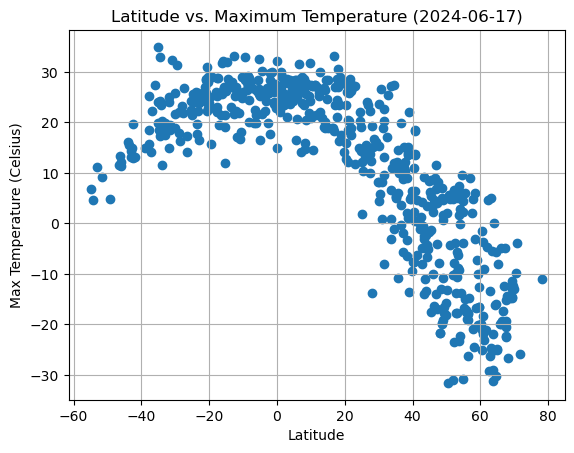

In [13]:
# Build scatter plot for latitude vs. temperature
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(xvalues, yvalues, marker="o")
plt.title("Latitude vs. Maximum Temperature (2024-06-17)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

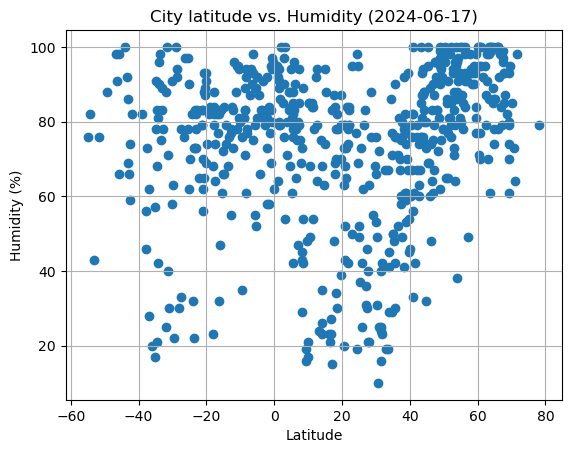

In [15]:
# Build the scatter plots for latitude vs. humidity
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(xvalues, yvalues, marker="o")
plt.title("City latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

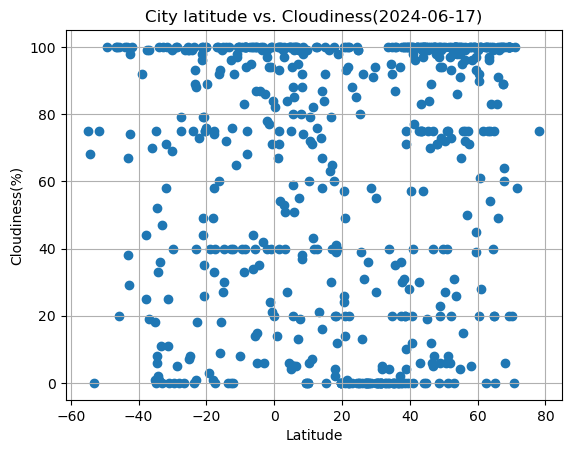

In [17]:
# Build the scatter plots for latitude vs. cloudiness
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(xvalues, yvalues, marker="o")
plt.title("City latitude vs. Cloudiness(2024-06-17)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

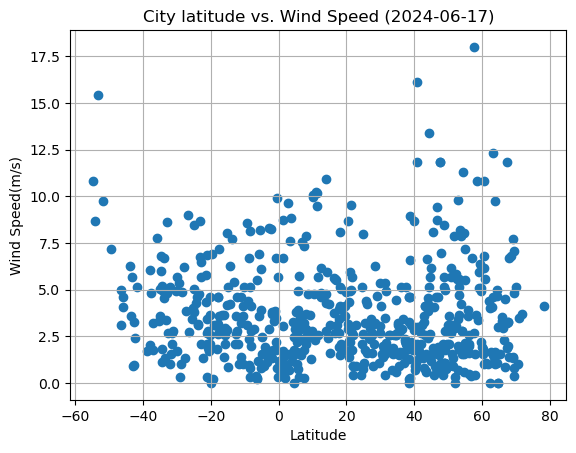

In [19]:
# Build the scatter plots for latitude vs. wind speed
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(xvalues, yvalues, marker="o")
plt.title("City latitude vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, xlabel, ylabel, title):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate the regression line values
    regress_values = slope * x_values + intercept
    

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-29.06,61,75,9.77,CA,1734642125
1,udachny,66.4167,112.4000,-19.33,92,99,2.28,RU,1734642126
3,progreso,21.2833,-89.6667,25.80,73,93,4.97,MX,1734642128
5,brad,46.1333,22.7833,3.55,74,12,0.89,RO,1734641997
8,lugus,5.7036,120.8203,28.31,80,85,4.93,PH,1734642134


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.83,88,100,7.20,TF,1734642127
4,port elizabeth,-33.9180,25.5701,20.17,96,100,6.69,ZA,1734642129
6,quellon,-43.1167,-73.6167,13.13,69,67,5.70,CL,1734642131
7,loa janan,-0.5830,117.0950,23.90,97,100,0.82,ID,1734642133
11,lorengau,-2.0226,147.2712,28.30,81,99,3.69,PG,1734642137


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7418370543049566


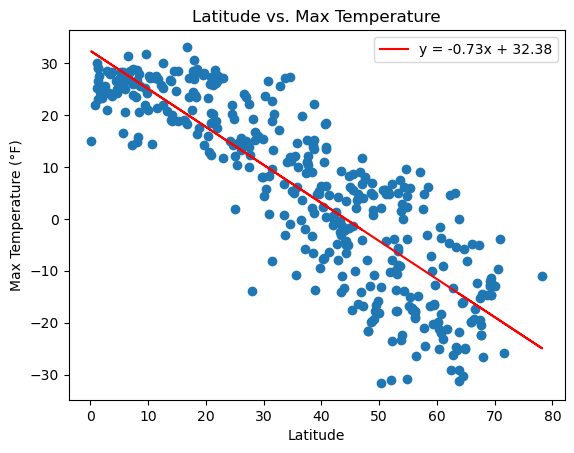

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Max Temperature')

# Calculate R^2 value
r_squared = r_value ** 2
print(f"The r^2-value is: {r_squared}")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show the legend
plt.legend()


# Display the plot
plt.show()

The r^2-value is: 0.36812233486071294


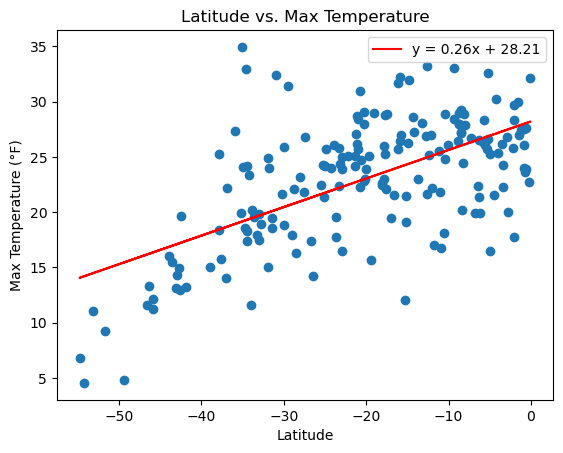

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Max Temperature')

# Calculate R^2 value
r_squared = r_value ** 2
print(f"The r^2-value is: {r_squared}")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show the legend
plt.legend()


# Display the plot
plt.show()

**Discussion about the linear relationship:** The R² values illustrate that latitude has a strong positive correlation with maximum temperature in the Northern Hemisphere. In contrast, the Southern Hemisphere shows a weak correlation, indicating that latitude accounts for only a small fraction of temperature variability, likely due to the influence of other factors such as ocean currents and geographical features. This highlights the complexity of climatic influences and their differing impacts across the two hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.1108861709297047


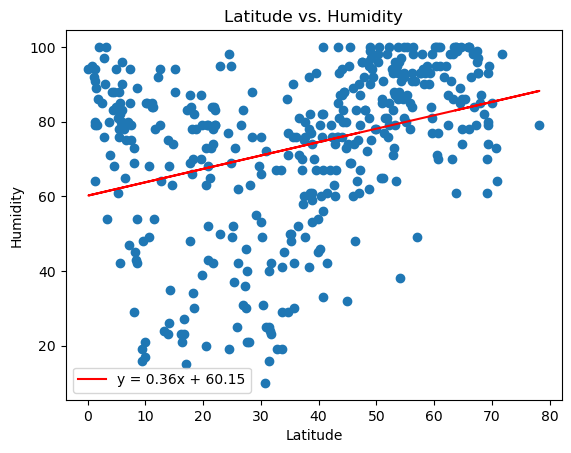

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Calculate R^2 value
r_squared = r_value ** 2
print(f"The r^2-value is: {r_squared}")


# Show the legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig7.png")

# Display the plot
plt.show()

The r^2-value is: 0.03478396142808374


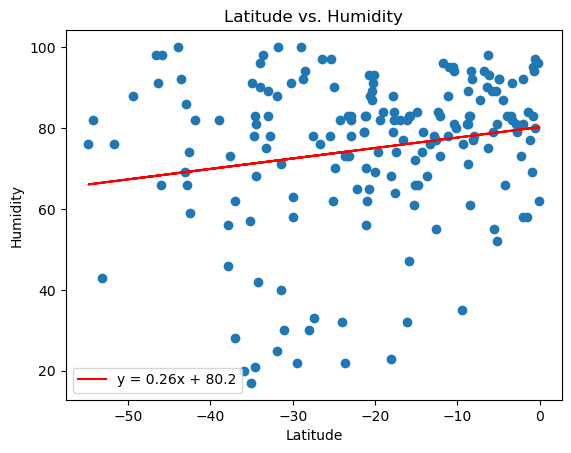

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Calculate R^2 value
r_squared = r_value ** 2
print(f"The r^2-value is: {r_squared}")


# Show the legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig8.png")

# Display the plot
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, low r² values indicate that latitude contributes minimally to variations in humidity, with other factors like seasonal changes, geography, ocean currents, and prevailing winds being more influential. This highlights the necessity for meteorological studies and climate science to consider a broader range of influences on humidity beyond just latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.1108861709297047


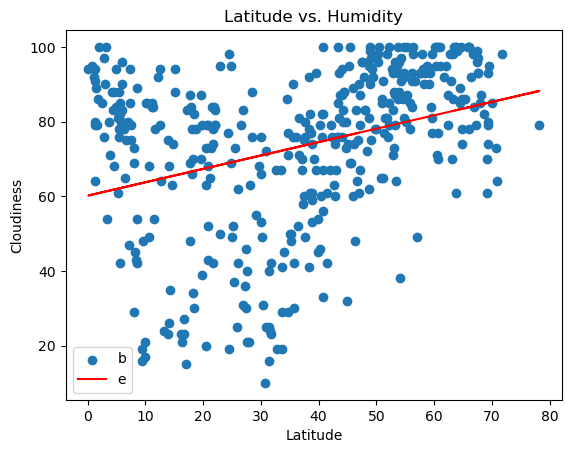

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Humidity')

# Calculate R^2 value
r_squared = r_value ** 2
print(f"The r^2-value is: {r_squared}")

# Show the legend
plt.legend('best')

# Save the figure
plt.savefig("output_data/Fig9.png")

# Display the plot
plt.show()

The r^2-value is: 0.013997701361678721


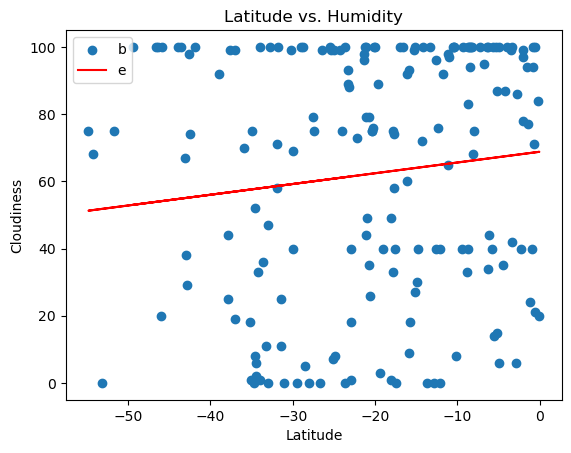

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Humidity')

# Calculate R^2 value
r_squared = r_value ** 2
print(f"The r^2-value is: {r_squared}")

# Show the legend
plt.legend('best')

# Save the figure
plt.savefig("output_data/Fig10.png")

# Display the plot
plt.show()

**Discussion about the linear relationship:** The analysis of Linear Regression plots indicates that both cloudiness and humidity increases with latitude in both hemispheres, with the strength of these relationships measured by statistic proportion of the variance for a dependent variable (R^2). The higher the R^2 the strongest linear relationship it is, aiding in understanding the variation of cloudiness and humidity with latitude across different regions.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0008113032947422922


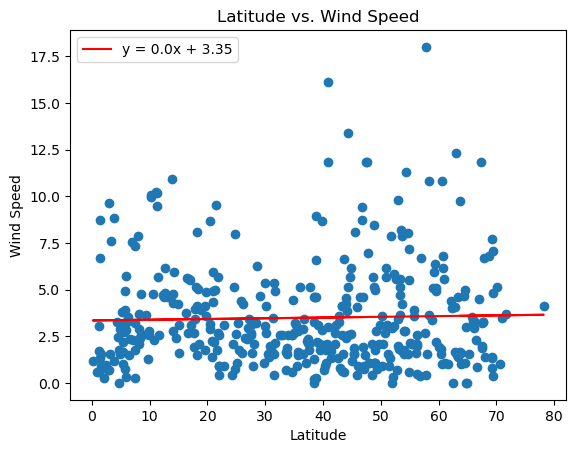

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Calculate R^2 value
r_squared = r_value ** 2
print(f"The r^2-value is: {r_squared}")

# Show the legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig11.png")

# Display the plot
plt.show()

The r^2-value is: 0.06461293883767101


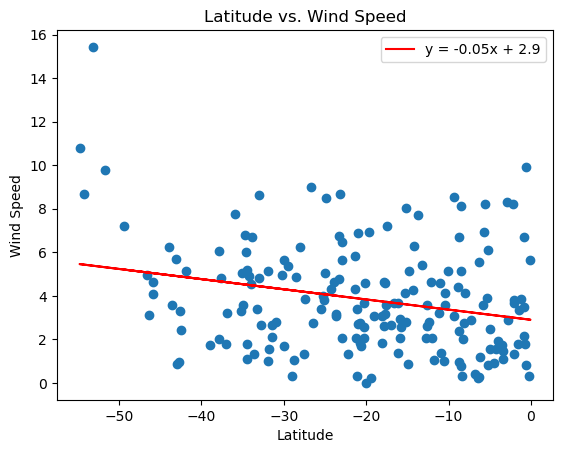

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Calculate R^2 value
r_squared = r_value ** 2
print(f"The r^2-value is: {r_squared}")


# Show the legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig12.png")

# Display the plot
plt.show()

**Discussion about the linear relationship:** The analysis of the linear relationship between wind speed and latitude provides important insights into atmospheric dynamics and climatic variations. By interpreting regression results, including slopes and R² values, we can better understand the influence of latitude on wind patterns and identify other factors that may affect these relationships, guiding future research in this area.